In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:28<00:00, 56.7MB/s]
100% 1.06G/1.06G [00:28<00:00, 40.1MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
conv_base.trainable = False

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
625/625 [==============================] - 163s 259ms/step - loss: 0.3170 - accuracy: 0.8655 - val_loss: 0.2139 - val_accuracy: 0.9090
Epoch 2/10
625/625 [==============================] - 160s 255ms/step - loss: 0.2446 - accuracy: 0.8950 - val_loss: 0.2698 - val_accuracy: 0.8764
Epoch 3/10
625/625 [==============================] - 159s 255ms/step - loss: 0.2250 - accuracy: 0.9026 - val_loss: 0.2066 - val_accuracy: 0.9102
Epoch 4/10
625/625 [==============================] - 159s 254ms/step - loss: 0.2113 - accuracy: 0.9114 - val_loss: 0.1968 - val_accuracy: 0.9172
Epoch 5/10
625/625 [==============================] - 159s 254ms/step - loss: 0.2039 - accuracy: 0.9132 - val_loss: 0.1975 - val_accuracy: 0.9160
Epoch 6/10
625/625 [==============================] - 159s 254ms/step - loss: 0.1971 - accuracy: 0.9161 - val_loss: 0.2001 - val_accuracy: 0.9154
Epoch 7/10
625/625 [==============================] - 159s 254ms/step - loss: 0.1876 - accuracy: 0.9208 - val_loss: 0.1950 -

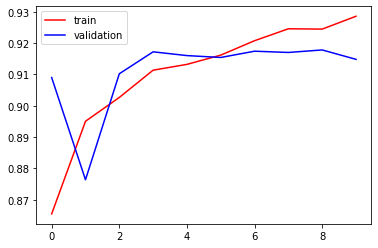

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

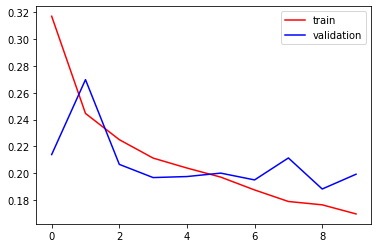

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()